In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def f(x, u):
    return np.sqrt(np.linalg.norm(x)**2 + u**2) - u

def g(x, u):
    return x / np.sqrt(np.linalg.norm(x)**2 + u**2)

def h(x, u):
    d = x.shape[0]
    c1 = 1 / np.sqrt(np.linalg.norm(x)**2 + u**2)
    c2 = 1 / (np.linalg.norm(x)**2 + u**2)
    return c1 * (np.eye(d) - c2*np.outer(x, x))

def h_inv(x, u):
    d = x.shape[0]
    c = np.sqrt(np.linalg.norm(x)**2 + u**2)
    return c * (np.eye(d) + (np.outer(x, x) / (u**2)))

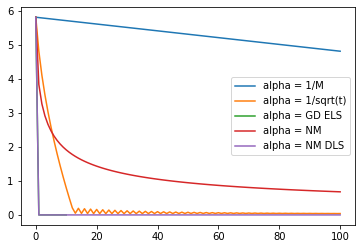

In [87]:
def gd(x0, u, a, num_iter=100):
    x = x0
    t_list = [0]
    f_list = [f(x0, u)]
    for t in range(1, num_iter+1):
        xn = x - a*g(x, u)
        t_list.append(t)
        f_list.append(f(xn, u))
        x = xn
    return t_list, f_list

def gda(x0, u, num_iter=100):
    x = x0
    t_list = [0]
    f_list = [f(x0, u)]
    for t in range(1, num_iter+1):
        a = 1/np.sqrt(t)
        xn = x - a*g(x, u)
        t_list.append(t)
        f_list.append(f(xn, u))
        x = xn
    return t_list, f_list

def gd_dls(x0, u, num_iter=10):
    """
    Always reaches minimum in one step.
    """
    x = x0
    t_list = [0]
    f_list = [f(x0, u)]
    for t in range(1, num_iter+1):
        a = f(x, u) + u
        xn = x - a*g(x, u)
        t_list.append(t)
        f_list.append(f(xn, 0))
        x = xn
    return t_list, f_list 

def nm(x0, u, a, num_iter=100):
    x = x0
    t_list = [0]
    f_list = [f(x0, u)]
    for t in range(1, num_iter+1):
        xn = x - a*h_inv(x, u)@g(x, u)
        t_list.append(t)
        f_list.append(f(xn, u))
        x = xn
    return t_list, f_list
        
def nm_dls(x0, u, num_iter=100):
    x = x0
    t_list = [0]
    f_list = [f(x0, u)]
    for t in range(1, num_iter+1):
        a = (u**2) / (u**2 + np.linalg.norm(x)**2)
        xn = x - a*h_inv(x, u)@g(x, u)
        t_list.append(t)
        f_list.append(f(xn, u))
        x = xn
    return t_list, f_list
        
n = 100
u = 0.01
a = u
x0 = np.random.rand(n)
t1_list, f1_list = gd(x0, u, a)
t2_list, f2_list = gda(x0, u)
t3_list, f3_list = gd_dls(x0, u)
t4_list, f4_list = nm(x0, u, 1e-6)
t5_list, f5_list = nm_dls(x0, u)


fig, ax, = plt.subplots()
ax.plot(t1_list, f1_list, label='alpha = 1/M')
ax.plot(t2_list, f2_list, label='alpha = 1/sqrt(t)')
ax.plot(t3_list, f3_list, label='alpha = GD ELS')
ax.plot(t4_list, f4_list, label='alpha = NM')
ax.plot(t5_list, f5_list, label='alpha = NM DLS')
ax.legend()
plt.show()

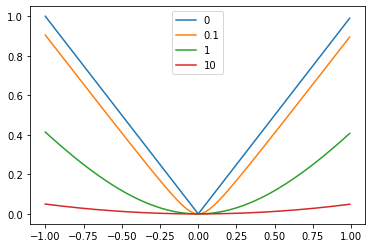

In [37]:
fig, ax = plt.subplots()
for u in [0, 0.1, 1, 10]:
    x = np.arange(-1, 1, 0.01)
    y = [f(_x, u) for _x in x]
    ax.plot(x, y, label=u)
ax.legend()
plt.show()

In [91]:
### Tes
n=2
u, v, w = np.random.rand(3, n)

In [92]:
A = np.outer(u, u) + np.outer(v, v)

In [101]:
A@A*(w@w)

array([[1.5138904 , 1.31258773],
       [1.31258773, 1.13805269]])

In [102]:
A@np.outer(w, w)@A

array([[1.47081612, 1.27535873],
       [1.27535873, 1.10587576]])

In [103]:
A@A@np.outer(w, w)

array([[1.25298507, 1.52671452],
       [1.08637526, 1.32370681]])

In [109]:
a = np.outer(u, u)@w + np.outer(v, v)@w

In [110]:
np.outer(a, a)

array([[1.47081612, 1.27535873],
       [1.27535873, 1.10587576]])